# put together and plots the _FINAL_ SOI

## to run on the 5th of each month, when the official monthly Tahiti and Darwin MSLP values are in 

In [6]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [8]:
import pathlib

In [9]:
import pandas as pd
import numpy as np
import requests
import urllib.request, urllib.error, urllib.parse
from dateutil import parser as dparser
from datetime import datetime, timedelta
from monthdelta import monthdelta
from calendar import month_abbr
import subprocess
import sys, os

In [13]:
clim_start = 1981
clim_end = 2010

### set the path to the NCC S: drive here 

In [14]:
ncc_sdrive = pathlib.Path.home() / 'drives/well_scratch/ncc'

In [15]:
ncc_sdrive

PosixPath('/home/nicolasf/drives/well_scratch/ncc')

### get the Tahiti and Darwin MSLP 'official' values 

In [16]:
def get_BOM_MSLP(station='tahiti'):
    
    url = "ftp://ftp.bom.gov.au/anon/home/ncc/www/sco/soi/{}mslp.html".format(station)
    
    req = urllib.request.Request(url)

    r = urllib.request.urlopen(req)

    data = r.read()

    data = data.splitlines()

    with open('./{}_text'.format(station), 'w') as fout: 
        if station == 'tahiti':
            data = data[15:-1]
        else:
            data = data[14:-1]

        data = [x.decode('utf-8') for x in data]
        data = [x+'\n' for x in data]
        fout.writelines(data)
    
    data = pd.read_table('./{}_text'.format(station),sep='\s+', engine='python', na_values='*', index_col=['Year'])
    
    os.remove('./{}_text'.format(station))
    
    return(data)


### TAHITI

In [17]:
tahitidf = get_BOM_MSLP(station='tahiti')

In [18]:
tahitidf.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2019,1011.1,1010.7,1011.1,1012.3,1012.8,1013.7,1014.3,1015.3,1014.8,1013.4,1011.2,1010.8
2020,1011.9,1011.5,1012.1,1012.8,1014.4,1012.9,1014.3,1015.7,1015.7,1013.6,1013.3,1013.3
2021,1013.5,1012.0,1012.0,1012.3,1013.4,1014.6,1015.7,1015.7,1015.9,1013.7,1013.1,1012.7
2022,1011.8,1013.2,1014.0,1013.6,1014.3,1015.5,1015.4,1015.3,1016.7,1015.1,1012.2,1013.0
2023,1012.9,1012.1,1012.0,1011.5,1012.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DARWIN

In [19]:
darwindf = get_BOM_MSLP(station='darwin')

In [20]:
darwindf.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2019,1006.8,1009.0,1008.4,1010.1,1012.3,1013.8,1014.2,1014.3,1014.5,1011.4,1009.7,1008.4
2020,1007.2,1007.4,1009.1,1010.5,1012.4,1012.9,1012.7,1012.5,1011.6,1010.0,1009.0,1006.5
2021,1005.6,1005.0,1008.1,1009.7,1011.3,1013.1,1012.3,1013.3,1012.0,1009.7,1008.3,1006.5
2022,1006.5,1006.9,1007.5,1008.5,1010.4,1011.7,1013.1,1012.2,1011.3,1009.3,1008.6,1005.6
2023,1006.0,1005.3,1008.4,1009.1,1013.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
"""
climatological period
"""
clim_start = clim_start
clim_end = clim_end
clim = "{}_{}".format(clim_start, clim_end)

If T and D are the monthly pressures at Tahiti and Darwin, respectively, and Tc and Dc the climatological monthly pressures, then: 
```
SOI    =   [ (T – Tc) – (D – Dc) ]  /  [ StDev (T – D)  ]
```

The reference is: 

**Troup, A.J,, 1965: The Southern Oscillation. Quarterly Journal of Royal Meteorological
Society 91, 490-506.**

In [22]:
### ==============================================================================================================
tahiti_cli = tahitidf.loc[clim_start:clim_end,:]
darwin_cli = darwindf.loc[clim_start:clim_end,:]

tahiti_mean = tahiti_cli.mean(0)
darwin_mean = darwin_cli.mean(0)
### ==============================================================================================================

### ==============================================================================================================
### Step 3: calculate the SOI
soi = ((tahitidf - tahiti_mean) - (darwindf - darwin_mean)) / ((tahiti_cli -  darwin_cli).std(0))

In [23]:
soi.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2019,-0.012422,-0.920571,-0.254408,0.146256,-0.578193,-0.660018,-0.481909,-0.130638,-1.174775,-0.366939,-0.843285,-0.482897
2020,0.153205,-0.039173,-0.108569,0.206361,0.578193,-0.578197,0.541011,1.216569,0.961180,0.531687,0.792649,1.593403
2021,1.478224,1.025850,0.328948,0.386677,0.655285,0.649108,1.768516,0.726676,0.848761,0.756344,1.084781,1.310271
2022,0.401646,0.768775,1.592886,1.889309,2.042948,2.530977,1.018374,1.155333,1.691901,1.767299,0.383666,1.876535
2023,1.064156,0.952400,0.183109,0.266467,-1.503301,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### stack everything vertically and add a proper datetime index


In [24]:
ts_soi = pd.DataFrame(soi.stack())

dates = []
for i in range(len(ts_soi)):
    dates.append(dparser.parse("{}-{}-1".format(ts_soi.index.get_level_values(0)[i], ts_soi.index.get_level_values(1)[i])))

ts_soi.index = dates
ts_soi.columns = [['SOI']]

In [25]:
ts_soi.head()

,SOI
1876-01-01,1.022749
1876-02-01,0.989125
1876-03-01,0.377561
1876-04-01,0.927624
1876-05-01,0.963654


In [26]:
ts_soi.tail()

,SOI
2023-01-01,1.064156
2023-02-01,0.952400
2023-03-01,0.183109
2023-04-01,0.266467
2023-05-01,-1.503301


### here choose the period to display 

In [27]:
# ts_soi = ts_soi.truncate(before="2016/1/1")

### calculate the 3 months rolling averages 

In [28]:
ts_soi[['SOIRM']] = ts_soi.rolling(window=3, min_periods=3, center=False).mean()

In [29]:
ts_soi

,SOI,SOIRM
1876-01-01,1.022749,NaN
1876-02-01,0.989125,NaN
1876-03-01,0.377561,0.796478
1876-04-01,0.927624,0.764770
1876-05-01,0.963654,0.756280
...,...,...
2023-01-01,1.064156,1.108119
2023-02-01,0.952400,1.297697
2023-03-01,0.183109,0.733221
2023-04-01,0.266467,0.467325


In [30]:
print(f"{ts_soi.index[-1]:%Y-%m}") 

2023-05


In [31]:
ts_soi.to_csv(f'./NIWA_SOI_updated_to_{ts_soi.index[-1]:%Y-%m}.csv')

### some munging to get the xticks right and the width of the bars 

In [22]:
dates = np.array(ts_soi.index.to_pydatetime())
widths= np.array([(dates[j+1]-dates[j]).days for j in range(len(dates)-1)] + [30])

### get the values 

In [23]:
soi = ts_soi['SOI'].values.flatten()
soim = ts_soi['SOIRM'].values.flatten()

TypeError: only integer scalar arrays can be converted to a scalar index

In [24]:
## ==============================================================================================================
### plotting parameters
years   = YearLocator()
#months  = MonthLocator(bymonth=[1,3,5,7,9,11])
months  = MonthLocator()
mFMT = DateFormatter('%b')
yFMT = DateFormatter('\n\n%Y')
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2

### now plot the figure

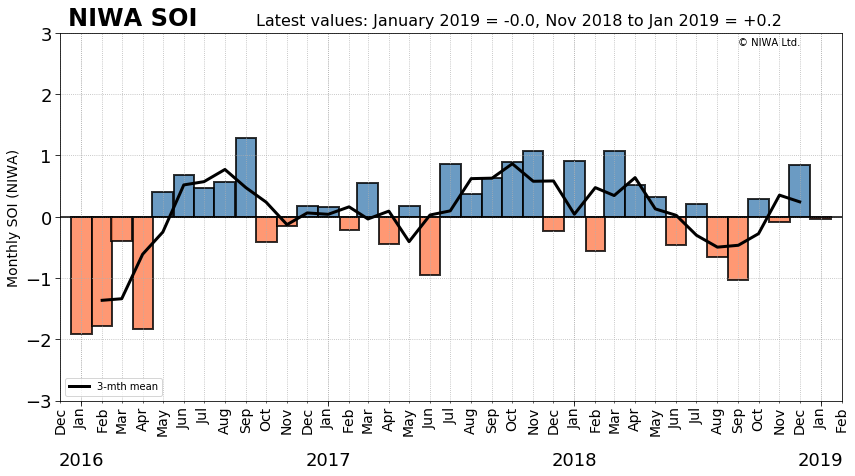

In [46]:
fig, ax = plt.subplots(figsize=(14,7))
fig.subplots_adjust(bottom=0.15)

ax.bar(dates[soi>=0],soi[soi>=0], width=widths[soi>=0], facecolor='steelblue', alpha=.8, edgecolor='k', lw=2)
ax.bar(dates[soi<0],soi[soi<0], width=widths[soi<0], facecolor='coral', alpha=.8, edgecolor='k', lw=2)

ax.plot(dates,soim, lw=3, color='k', label='3-mth mean')

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_formatter(mFMT)
ax.xaxis.set_major_formatter(yFMT)
ax.axhline(0, color='k')

labels = ax.get_xminorticklabels()
for label in labels:
    label.set_fontsize(14)
    label.set_rotation(90)
labels = ax.get_xmajorticklabels()
for label in labels:
    label.set_fontsize(18)
labels = ax.get_yticklabels()
for label in labels:
    label.set_fontsize(18)

ax.grid(linestyle=':')
ax.xaxis.grid(True, which='both', linestyle=':')
ax.legend(loc=3, fancybox=True)
ax.set_ylim(-3., 3.)
ax.set_ylabel('Monthly SOI (NIWA)', fontsize=14, backgroundcolor="w")

ax.text(0.01,1.02,"NIWA SOI", fontsize=24, fontweight='bold', transform=ax.transAxes)

ax.text(dates[-5], 2.8, "%s NIWA Ltd." % (u'\N{Copyright Sign}'))

ax.set_xlim(dates[0] - monthdelta(1), dates[-1] + monthdelta(1))

textBm = "{:%B %Y} = {:+3.1f}".format(dates[-1], soi[-1])

textBs = "%s to %s = %+3.1f" % (dates[-3].strftime("%b %Y"), dates[-1].strftime("%b %Y"), soi[-3:].mean())

ax.text(0.25,1.02,"Latest values: {}, {}".format(textBm, textBs), fontsize=16, transform=ax.transAxes);

fig.savefig(ncc_sdrive / 'indices/figures/real_time_monthly_NIWA_SOI_1941_2010.png', dpi=200)
fig.savefig(pathlib.Path.home() / 'Desktop/real_time_monthly_NIWA_SOI_1941_2010.png', dpi=200)